In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import sys
import numpy as np
import torch.utils.data as utils
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
sys.path.append("../../Dataset-REPAIR")
from utils.datasets import ColoredDataset
import pickle as pkl

from os.path import join as oj
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
save_path = "../results_for_export"

In [3]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("purple"),10))
colors = [x.get_rgb() for x in colors]

In [4]:
colors = np.asarray(colors)[:,:, None, None]
# colors /=colors.sum(axis =1)[:, None]
with open( "colors.pkl", 'wb') as f:
    pkl.dump(colors, f)
  

In [5]:
x_train = np.load(oj("../data/ColorMNIST", "train_x.npy"))
y_train = np.load(oj("../data/ColorMNIST", "train_y.npy"))

In [6]:
x_test = np.load(oj("../data/ColorMNIST", "test_x.npy"))
y_test = np.load(oj("../data/ColorMNIST", "test_y.npy"))

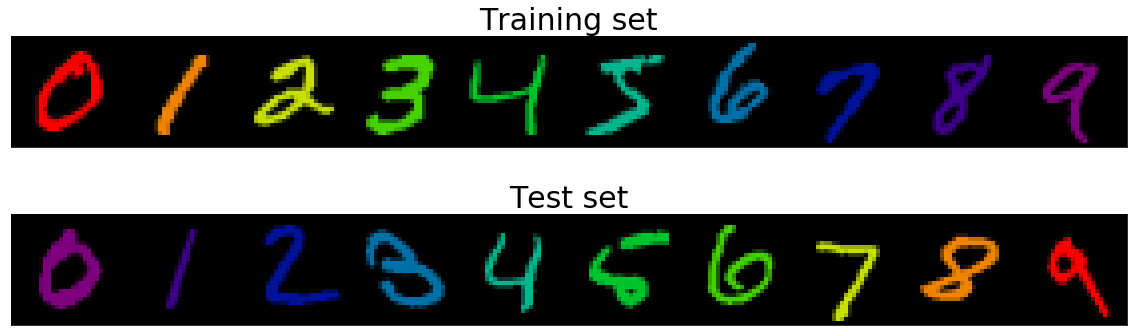

In [7]:
fig, axes = plt.subplots(nrows= 2, figsize = (20, 6))
indices = []
for i in range(10):
    indices.append(np.where(y_train ==i)[0][0])
ex_imgs = np.hstack(x_train[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) +1
ex_imgs/=2
axes[0].imshow(ex_imgs);
axes[0].set_title("Training set", fontsize = 30)
indices = []
for i in range(10):
    indices.append(np.where(y_test ==i)[0][0])
ex_imgs = np.hstack(x_test[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) +1
ex_imgs/=2
axes[1].imshow(ex_imgs);
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_title("Test set", fontsize = 30)
fig.savefig(oj(save_path, "ColorMNIST_examples"))
